### 네이버 지식 IN 병명으로 이진 분류하기 - 정신과
- dataset: './data/'
- feature: text data
- label: others, psychiatry
- frame work: Pytorch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from torch.utils.data import TensorDataset

import work_rnn_func as rnn

In [2]:
TRAIN_PATH = './data/train/'
TEST_PATH = './data/test/'
KO_STOPWORD = rnn.load_ko_stopwrod()

In [3]:
train_file_list = rnn.load_file_list(TRAIN_PATH)
test_file_list = rnn.load_file_list(TEST_PATH)

# train_file_list

In [4]:
len(train_file_list[0]), len(train_file_list[1])

(9000, 9009)

In [5]:
train_data_df = rnn.create_df(train_file_list)
train_data_df

,text,label
0,안녕하세요 라식이 필요한데 스마일라식이 좋다고 해서 스마일라식 안과를 알아봐야 하는...,0
1,안녕하세요 고 학생입니다 예전부터 몇년 된거같아요 비문증이 있었는데 별로 신경안쓰다...,0
2,제가 이번에 안경탈출하려고 스마일라식안과를 찾고 있는데 병원이 너무 많아서 스마일라...,0
3,최근 아버지가 백내장판정을 받고 백내장수술을 하기위해 안과를 가야한다고하는데요 아는...,0
4,성인 되면 꼭 스마일라식 하려고 마음먹고 있었는데요 수험생이면 수험표 이벤트 같은거...,0
...,...,...
17689,정신과약을 복용후에 살이 키로 넘게 쪗는데 혹시 그냥 살이찐건지 정신과약때문에 찐건...,1
17690,월 일에 사후피임약 엘라원복용햇는데 오늘 월 일 오후 정신과에서 꾸준히 맞고 있는...,1
17691,고 인데 정신과 처음 가면 뭐부터 하나요,1
17692,현재 고 학생입니다 우울감을 앓은지 최소 인지하기로 년 정도 되었습니다 중 중 때는...,1


In [6]:
test_data_df = rnn.create_df(test_file_list, 'test/')
test_data_df

,text,label
0,평소에도 마른기침을 자주하는데 기침이 너무 심해서 이비인후과를 가서 약을 타려고 했...,0
1,음식 씹을때마다 귀 안이 아픈데 치과랑 이비인후과중 어디가야하나요,0
2,목안에 큰 편도결석이 일주일째 안빠지고 있는데 이물감고 들고 불편해서요 이비인후과가...,0
3,안녕하세요 임파선염으로 이비인후과에서 보령메이액트정 항생제 처방받았고 피부과에서는 ...,0
4,안녕하세요 제가 평소에 비염 때문에 고생 중이라서요 비염이 너무 심하다 보니 일상생...,0
...,...,...
1978,로 정신과 가보려는데 진단받으면 기록 남아서 나중에 취업같은거에 문제될 수 있나요,1
1979,정신과약을 복용후에 살이 키로 넘게 쪗는데 혹시 그냥 살이찐건지 정신과약때문에 찐건...,1
1980,월 일에 사후피임약 엘라원복용햇는데 오늘 월 일 오후 정신과에서 꾸준히 맞고 있는...,1
1981,고 인데 정신과 처음 가면 뭐부터 하나요,1


In [7]:
train_data_df['label'].value_counts()

label
0    8980
1    8714
Name: count, dtype: int64

In [8]:
test_data_df['label'].value_counts()

label
0    996
1    987
Name: count, dtype: int64

- ????

In [9]:
ko_spacy = rnn.ko_spacy

In [18]:
del_stop_train = []
for text in rnn.delete_stopwords(train_data_df, KO_STOPWORD):
    # print(text)
    del_stop_train.append(text)
del_stop_train

[[['안녕하세요',
   '라식',
   '필요한데',
   '스마일',
   '라',
   '식이',
   '좋다고',
   '해서',
   '스마일',
   '라식',
   '안과',
   '알아봐야',
   '하는데',
   '스마일',
   '라식',
   '안과',
   '는',
   '선택',
   '하는게',
   '좋나요',
   '주변',
   '에도',
   '안과',
   '여러',
   '군데',
   '많은',
   '편이',
   '고',
   '선택',
   '해야',
   '할지',
   '궁금합니다'],
  ['안녕하세요',
   '고',
   '학생',
   '입니다',
   '예전',
   '된거',
   '같아요',
   '비문증',
   '있었는데',
   '별로',
   '신경안',
   '쓰다가',
   '최근',
   '비문증',
   '실명',
   '갈',
   '수',
   '있다고',
   '해서',
   '갑자기',
   '걱정',
   '되는데',
   '안과',
   '도',
   '안',
   '간지',
   '한',
   '은',
   '된거',
   '같고',
   '시력',
   '도',
   '엄청',
   '안좋았는데',
   '안경',
   '도',
   '최근',
   '맞추고',
   '눈',
   '별로',
   '신경',
   '안',
   '썼었거든요',
   '현재',
   '상태',
   '봤을',
   '비문증',
   '실명',
   '갈',
   '수',
   '있을까요',
   '안과',
   '한번',
   '꼭',
   '가봐야겠죠',
   '맑은',
   '하늘',
   '보면',
   '심각해지고',
   '흰색',
   '점',
   '같은게',
   '엄청',
   '많이',
   '보',
   '여요',
   '심한건',
   '가요'],
  ['안경',
   '탈출',
   '려고',
   '스마일',
   '라',
   '식안과를',
   '찾고',
   

In [20]:
train_data_df['del_stop'] = del_stop_train[0]
train_data_df

,text,label,del_stop
0,안녕하세요 라식이 필요한데 스마일라식이 좋다고 해서 스마일라식 안과를 알아봐야 하는...,0,"[안녕하세요, 라식, 필요한데, 스마일, 라, 식이, 좋다고, 해서, 스마일, 라식..."
1,안녕하세요 고 학생입니다 예전부터 몇년 된거같아요 비문증이 있었는데 별로 신경안쓰다...,0,"[안녕하세요, 고, 학생, 입니다, 예전, 된거, 같아요, 비문증, 있었는데, 별로..."
2,제가 이번에 안경탈출하려고 스마일라식안과를 찾고 있는데 병원이 너무 많아서 스마일라...,0,"[안경, 탈출, 려고, 스마일, 라, 식안과를, 찾고, 있는데, 병원, 너무, 많아..."
3,최근 아버지가 백내장판정을 받고 백내장수술을 하기위해 안과를 가야한다고하는데요 아는...,0,"[최근, 아버지, 백내장, 판정, 받고, 백내장, 수술, 하기, 위해, 안과, 가야..."
4,성인 되면 꼭 스마일라식 하려고 마음먹고 있었는데요 수험생이면 수험표 이벤트 같은거...,0,"[성인, 되면, 꼭, 스마일, 라식, 하려고, 마음먹고, 있었는데요, 수험생, 면,..."
...,...,...,...
17689,정신과약을 복용후에 살이 키로 넘게 쪗는데 혹시 그냥 살이찐건지 정신과약때문에 찐건...,1,"[정신과, 약, 복용, 후, 살이, 키로, 넘게, 쪗는데, 그냥, 살이, 찐, 건지..."
17690,월 일에 사후피임약 엘라원복용햇는데 오늘 월 일 오후 정신과에서 꾸준히 맞고 있는...,1,"[사후, 피임, 약, 엘라, 원, 복용, 햇, 는데, 오늘, 오후, 정신과, 꾸준히..."
17691,고 인데 정신과 처음 가면 뭐부터 하나요,1,"[고, 인데, 정신과, 처음, 가면, 뭐, 하나요]"
17692,현재 고 학생입니다 우울감을 앓은지 최소 인지하기로 년 정도 되었습니다 중 중 때는...,1,"[현재, 고, 학생, 입니다, 우울, 감, 앓은지, 최소, 인지, 하기로, 정도, ..."


In [21]:
del_stop_test = []
for text in rnn.delete_stopwords(test_data_df, KO_STOPWORD):
    del_stop_test.append(text)
del_stop_test

[[['평소',
   '에도',
   '마른',
   '기침',
   '자주',
   '하는데',
   '기침',
   '너무',
   '심해서',
   '이비인후과',
   '가서',
   '약',
   '타',
   '려고',
   '했는데',
   '내시경',
   '하고',
   '찍어',
   '봐야',
   '결과',
   '알수있다는데',
   '어디가',
   '안좋아서',
   '찍는건',
   '가요',
   '원래',
   '기본',
   '검사',
   '인가요'],
  ['음식', '씹을', '마다', '귀', '안이', '아픈데', '치과', '랑', '이비인후과', '중', '어디가', '하나요'],
  ['목안',
   '큰',
   '편도결석',
   '일주일',
   '째',
   '안',
   '빠지고',
   '있는데',
   '물감',
   '고',
   '들고',
   '불편해서요',
   '이비인후과',
   '가면',
   '빼주나요'],
  ['안녕하세요',
   '임파선',
   '염',
   '이비인후과',
   '보령',
   '메이',
   '액트정',
   '항생제',
   '처방',
   '받았고',
   '피부',
   '에서는',
   '주사',
   '피부염',
   '지루',
   '성',
   '피부염',
   '루',
   '리드',
   '정',
   '처방',
   '받았습니다',
   '경우',
   '이비인후과',
   '처방',
   '받은',
   '보령',
   '메이',
   '액트정',
   '만',
   '복용',
   '해도',
   '피부염',
   '증도',
   '사라질까',
   '요',
   '아님',
   '꼭',
   '둘다',
   '복용',
   '해야',
   '할까',
   '요'],
  ['안녕하세요',
   '평소',
   '비염',
   '때문',
   '고생',
   '중이',
   '라서',
   '요',
   '비염',
   '너무',
   '심

In [22]:
test_data_df['del_stop'] = del_stop_test[0]
test_data_df

,text,label,del_stop
0,평소에도 마른기침을 자주하는데 기침이 너무 심해서 이비인후과를 가서 약을 타려고 했...,0,"[평소, 에도, 마른, 기침, 자주, 하는데, 기침, 너무, 심해서, 이비인후과, ..."
1,음식 씹을때마다 귀 안이 아픈데 치과랑 이비인후과중 어디가야하나요,0,"[음식, 씹을, 마다, 귀, 안이, 아픈데, 치과, 랑, 이비인후과, 중, 어디가,..."
2,목안에 큰 편도결석이 일주일째 안빠지고 있는데 이물감고 들고 불편해서요 이비인후과가...,0,"[목안, 큰, 편도결석, 일주일, 째, 안, 빠지고, 있는데, 물감, 고, 들고, ..."
3,안녕하세요 임파선염으로 이비인후과에서 보령메이액트정 항생제 처방받았고 피부과에서는 ...,0,"[안녕하세요, 임파선, 염, 이비인후과, 보령, 메이, 액트정, 항생제, 처방, 받..."
4,안녕하세요 제가 평소에 비염 때문에 고생 중이라서요 비염이 너무 심하다 보니 일상생...,0,"[안녕하세요, 평소, 비염, 때문, 고생, 중이, 라서, 요, 비염, 너무, 심하다..."
...,...,...,...
1978,로 정신과 가보려는데 진단받으면 기록 남아서 나중에 취업같은거에 문제될 수 있나요,1,"[정신과, 가보려는데, 진단, 받으면, 기록, 남아, 서, 나중, 취업, 같은거에,..."
1979,정신과약을 복용후에 살이 키로 넘게 쪗는데 혹시 그냥 살이찐건지 정신과약때문에 찐건...,1,"[정신과, 약, 복용, 후, 살이, 키로, 넘게, 쪗는데, 그냥, 살이, 찐, 건지..."
1980,월 일에 사후피임약 엘라원복용햇는데 오늘 월 일 오후 정신과에서 꾸준히 맞고 있는...,1,"[사후, 피임, 약, 엘라, 원, 복용, 햇, 는데, 오늘, 오후, 정신과, 꾸준히..."
1981,고 인데 정신과 처음 가면 뭐부터 하나요,1,"[고, 인데, 정신과, 처음, 가면, 뭐, 하나요]"


In [23]:
carry_df = train_data_df.iloc[8980:]
carry_df

,text,label,del_stop
8980,정신과 급인데 사회복무요원으로 너무 가고싶어요 선발 인원 많은곳으로 본인신청 지원하...,1,"[정신과, 급, 인데, 사회, 복무, 요원, 너무, 가고싶어요, 선발, 인원, 많은..."
8981,안녕하세요 공황장애가 있어 약을 먹다가 조금씩 줄이다가 안 먹은지 좀 됐는지 최근이...,1,"[안녕하세요, 공황장애, 있어, 약, 먹다가, 조금씩, 줄이다가, 안, 먹은지, 됐..."
8982,정신과약 에프람정 처방을 받았는데요 우울이랑 불안 공황은 좀 괜찮아 지는데 잠을 깊...,1,"[정신과, 약, 에프, 람정, 처방, 받았는데요, 우울, 이랑, 불안, 공황, 은,..."
8983,아니걍 왠만하면 이런거 안 물어보는데 제 상태가 말이 아니어서 그냥 상담좀받고 약 ...,1,"[걍, 왠만하면, 이런거, 안, 물어보는데, 상태, 말, 아니어서, 그냥, 상담, ..."
8984,안녕하세요 저는 살 대학생입니다 다른 분들처럼 우울증이 있거나 그런것 같진 않습니다...,1,"[안녕하세요, 는, 살, 대학생, 입니다, 분, 처럼, 우울증, 있거나, 그런것, ..."
...,...,...,...
17689,정신과약을 복용후에 살이 키로 넘게 쪗는데 혹시 그냥 살이찐건지 정신과약때문에 찐건...,1,"[정신과, 약, 복용, 후, 살이, 키로, 넘게, 쪗는데, 그냥, 살이, 찐, 건지..."
17690,월 일에 사후피임약 엘라원복용햇는데 오늘 월 일 오후 정신과에서 꾸준히 맞고 있는...,1,"[사후, 피임, 약, 엘라, 원, 복용, 햇, 는데, 오늘, 오후, 정신과, 꾸준히..."
17691,고 인데 정신과 처음 가면 뭐부터 하나요,1,"[고, 인데, 정신과, 처음, 가면, 뭐, 하나요]"
17692,현재 고 학생입니다 우울감을 앓은지 최소 인지하기로 년 정도 되었습니다 중 중 때는...,1,"[현재, 고, 학생, 입니다, 우울, 감, 앓은지, 최소, 인지, 하기로, 정도, ..."


In [24]:
token_freq = rnn.token_frequence(carry_df)
token_freq

{'정신과': 10265,
 '급': 50,
 '인데': 2178,
 '사회': 25,
 '복무': 18,
 '요원': 4,
 '너무': 1541,
 '가고싶어요': 1,
 '선발': 1,
 '인원': 2,
 '많은': 8,
 '곳': 60,
 '본인': 12,
 '신청': 13,
 '지원': 15,
 '하는': 1520,
 '수': 1324,
 '밖에': 34,
 '없나요': 17,
 '안녕하세요': 66,
 '공황장애': 32,
 '있어': 400,
 '약': 8168,
 '먹다가': 11,
 '조금씩': 7,
 '줄이다가': 3,
 '안': 2676,
 '먹은지': 10,
 '됐는지': 155,
 '최근': 432,
 '스트레스': 81,
 '받아서': 33,
 '오늘': 674,
 '한번': 704,
 '오랜': 7,
 '만': 1613,
 '먹게': 2,
 '되었는데': 4,
 '받은': 45,
 '비닐': 1,
 '포장': 1,
 '된': 651,
 '알프': 14,
 '람정': 16,
 '놀정': 730,
 '팍세': 1,
 '론틴': 1,
 '서': 2216,
 '방정': 1474,
 '입니다': 1326,
 '자체': 12,
 '쎈': 2,
 '은': 3667,
 '다': 1547,
 '아닌': 31,
 '걸': 364,
 '알': 235,
 '고': 2198,
 '있는데': 457,
 '봉지': 10,
 '보': 166,
 '니까': 317,
 '처방': 1935,
 '받고': 146,
 '개월': 45,
 '지났더라구요': 1,
 '이미': 24,
 '먹긴': 3,
 '했는데': 472,
 '먹어도': 1945,
 '괜찮을까요': 22,
 '예전': 483,
 '의사': 1252,
 '쌤': 19,
 '께': 74,
 '서도': 12,
 '라도': 169,
 '증상': 134,
 '다시': 41,
 '있으면': 35,
 '먹다': 2,
 '먹음': 1,
 '괜찮다고': 2,
 '하신게': 1,
 '생각나서요': 1,
 '근데': 408,
 

In [25]:
sorted_data_list = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)
sorted_data_list

[('정신과', 10265),
 ('약', 8168),
 ('요', 3951),
 ('은', 3667),
 ('생각', 3513),
 ('우울', 3381),
 ('안', 2676),
 ('상담', 2560),
 ('도', 2465),
 ('감', 2464),
 ('병원', 2376),
 ('정', 2276),
 ('중', 2225),
 ('서', 2216),
 ('고', 2198),
 ('건가', 2181),
 ('인데', 2178),
 ('되는', 2157),
 ('복용', 2106),
 ('는', 2009),
 ('살이', 1999),
 ('먹어도', 1945),
 ('많이', 1939),
 ('처방', 1935),
 ('주사', 1897),
 ('그냥', 1885),
 ('건지', 1793),
 ('만', 1613),
 ('다', 1547),
 ('너무', 1541),
 ('있는', 1525),
 ('하는', 1520),
 ('정도', 1515),
 ('인', 1507),
 ('방정', 1474),
 ('건', 1389),
 ('거', 1342),
 ('진단', 1335),
 ('입니다', 1326),
 ('수', 1324),
 ('찐', 1316),
 ('때문', 1307),
 ('이나', 1279),
 ('있나요', 1274),
 ('맞아도', 1264),
 ('가면', 1258),
 ('의사', 1252),
 ('한', 1235),
 ('정신', 1227),
 ('받으면', 1197),
 ('심해서', 1196),
 ('선생님', 1177),
 ('적', 1115),
 ('과를', 1101),
 ('진정', 1010),
 ('상태', 983),
 ('정말', 976),
 ('가야', 958),
 ('공부', 948),
 ('날', 937),
 ('번', 935),
 ('죽', 933),
 ('충', 929),
 ('대한', 928),
 ('가끔', 924),
 ('치료', 920),
 ('하다', 920),
 ('죽고싶다는', 916),
 ('동이

In [26]:
train_vocab = rnn.create_vocab(token_freq)
len(train_vocab)

8693

In [28]:
def encoding(data_df, data_vocab):
    """
    token encoding

    Args:
        data_df (DataFrame): text data
        data_vocab (dict): data vocab dict

    Yields:
        list: encoding token data
    """
    encoding_data = []
    for token_list in data_df['del_stop']:
        sent = []
        for token in token_list:
            try:
                sent.append(data_vocab[token])
            except:
                sent.append(data_vocab['OOV'])
        encoding_data.append(sent)
    yield encoding_data

In [29]:
train_encoding = []
for text in encoding(train_data_df, train_vocab):
    train_encoding.append(text)
train_encoding

[[[497,
   1,
   3341,
   1,
   508,
   2314,
   1918,
   481,
   1,
   1,
   5114,
   6328,
   97,
   1,
   1,
   5114,
   21,
   400,
   703,
   2469,
   547,
   350,
   5114,
   628,
   2352,
   1059,
   3601,
   16,
   400,
   486,
   737,
   527],
  [497,
   16,
   209,
   40,
   211,
   4249,
   196,
   1,
   710,
   224,
   6125,
   1,
   299,
   1,
   1,
   141,
   41,
   643,
   481,
   572,
   507,
   826,
   5114,
   10,
   8,
   2117,
   49,
   5,
   4249,
   361,
   1,
   10,
   602,
   1,
   1,
   10,
   299,
   1,
   882,
   224,
   125,
   8,
   1,
   190,
   57,
   3149,
   1,
   1,
   141,
   41,
   496,
   5114,
   113,
   581,
   1,
   5119,
   1,
   222,
   3961,
   7649,
   809,
   928,
   602,
   24,
   393,
   1,
   6790,
   112],
  [1,
   1,
   2037,
   1,
   508,
   1,
   1176,
   260,
   12,
   31,
   758,
   1,
   1,
   5114,
   400,
   24,
   5402,
   1,
   1,
   5114,
   400,
   92,
   335,
   201,
   1,
   1949,
   74],
  [299,
   672,
   1,
   533,
   46

In [30]:
train_data_df['encoding'] = train_encoding[0]
train_data_df

,text,label,del_stop,encoding
0,안녕하세요 라식이 필요한데 스마일라식이 좋다고 해서 스마일라식 안과를 알아봐야 하는...,0,"[안녕하세요, 라식, 필요한데, 스마일, 라, 식이, 좋다고, 해서, 스마일, 라식...","[497, 1, 3341, 1, 508, 2314, 1918, 481, 1, 1, ..."
1,안녕하세요 고 학생입니다 예전부터 몇년 된거같아요 비문증이 있었는데 별로 신경안쓰다...,0,"[안녕하세요, 고, 학생, 입니다, 예전, 된거, 같아요, 비문증, 있었는데, 별로...","[497, 16, 209, 40, 211, 4249, 196, 1, 710, 224..."
2,제가 이번에 안경탈출하려고 스마일라식안과를 찾고 있는데 병원이 너무 많아서 스마일라...,0,"[안경, 탈출, 려고, 스마일, 라, 식안과를, 찾고, 있는데, 병원, 너무, 많아...","[1, 1, 2037, 1, 508, 1, 1176, 260, 12, 31, 758..."
3,최근 아버지가 백내장판정을 받고 백내장수술을 하기위해 안과를 가야한다고하는데요 아는...,0,"[최근, 아버지, 백내장, 판정, 받고, 백내장, 수술, 하기, 위해, 안과, 가야...","[299, 672, 1, 533, 468, 1, 783, 366, 669, 5114..."
4,성인 되면 꼭 스마일라식 하려고 마음먹고 있었는데요 수험생이면 수험표 이벤트 같은거...,0,"[성인, 되면, 꼭, 스마일, 라식, 하려고, 마음먹고, 있었는데요, 수험생, 면,...","[591, 218, 581, 1, 1, 700, 1, 2400, 1623, 194,..."
...,...,...,...,...
17689,정신과약을 복용후에 살이 키로 넘게 쪗는데 혹시 그냥 살이찐건지 정신과약때문에 찐건...,1,"[정신과, 약, 복용, 후, 살이, 키로, 넘게, 쪗는데, 그냥, 살이, 찐, 건지...","[2, 3, 20, 105, 22, 137, 129, 142, 27, 22, 42,..."
17690,월 일에 사후피임약 엘라원복용햇는데 오늘 월 일 오후 정신과에서 꾸준히 맞고 있는...,1,"[사후, 피임, 약, 엘라, 원, 복용, 햇, 는데, 오늘, 오후, 정신과, 꾸준히...","[162, 158, 3, 163, 154, 20, 164, 156, 121, 159..."
17691,고 인데 정신과 처음 가면 뭐부터 하나요,1,"[고, 인데, 정신과, 처음, 가면, 뭐, 하나요]","[16, 18, 2, 79, 47, 76, 74]"
17692,현재 고 학생입니다 우울감을 앓은지 최소 인지하기로 년 정도 되었습니다 중 중 때는...,1,"[현재, 고, 학생, 입니다, 우울, 감, 앓은지, 최소, 인지, 하기로, 정도, ...","[190, 16, 209, 40, 7, 11, 270, 255, 200, 262, ..."


In [31]:
test_encoding = []
for text in encoding(test_data_df, train_vocab):
    test_encoding.append(text)
    
test_data_df['encoding'] = test_encoding[0]
test_data_df

,text,label,del_stop,encoding
0,평소에도 마른기침을 자주하는데 기침이 너무 심해서 이비인후과를 가서 약을 타려고 했...,0,"[평소, 에도, 마른, 기침, 자주, 하는데, 기침, 너무, 심해서, 이비인후과, ...","[308, 350, 1, 2300, 638, 97, 2300, 31, 52, 150..."
1,음식 씹을때마다 귀 안이 아픈데 치과랑 이비인후과중 어디가야하나요,0,"[음식, 씹을, 마다, 귀, 안이, 아픈데, 치과, 랑, 이비인후과, 중, 어디가,...","[1349, 1, 183, 1700, 3065, 1, 3751, 89, 1504, ..."
2,목안에 큰 편도결석이 일주일째 안빠지고 있는데 이물감고 들고 불편해서요 이비인후과가...,0,"[목안, 큰, 편도결석, 일주일, 째, 안, 빠지고, 있는데, 물감, 고, 들고, ...","[1, 568, 1, 795, 405, 8, 1745, 260, 4331, 16, ..."
3,안녕하세요 임파선염으로 이비인후과에서 보령메이액트정 항생제 처방받았고 피부과에서는 ...,0,"[안녕하세요, 임파선, 염, 이비인후과, 보령, 메이, 액트정, 항생제, 처방, 받...","[497, 1, 2739, 1504, 2011, 1, 1, 2193, 25, 132..."
4,안녕하세요 제가 평소에 비염 때문에 고생 중이라서요 비염이 너무 심하다 보니 일상생...,0,"[안녕하세요, 평소, 비염, 때문, 고생, 중이, 라서, 요, 비염, 너무, 심하다...","[497, 308, 1026, 43, 1637, 998, 1092, 4, 1026,..."
...,...,...,...,...
1978,로 정신과 가보려는데 진단받으면 기록 남아서 나중에 취업같은거에 문제될 수 있나요,1,"[정신과, 가보려는데, 진단, 받으면, 기록, 남아, 서, 나중, 취업, 같은거에,...","[2, 138, 39, 51, 90, 123, 15, 117, 114, 149, 9..."
1979,정신과약을 복용후에 살이 키로 넘게 쪗는데 혹시 그냥 살이찐건지 정신과약때문에 찐건...,1,"[정신과, 약, 복용, 후, 살이, 키로, 넘게, 쪗는데, 그냥, 살이, 찐, 건지...","[2, 3, 20, 105, 22, 137, 129, 142, 27, 22, 42,..."
1980,월 일에 사후피임약 엘라원복용햇는데 오늘 월 일 오후 정신과에서 꾸준히 맞고 있는...,1,"[사후, 피임, 약, 엘라, 원, 복용, 햇, 는데, 오늘, 오후, 정신과, 꾸준히...","[162, 158, 3, 163, 154, 20, 164, 156, 121, 159..."
1981,고 인데 정신과 처음 가면 뭐부터 하나요,1,"[고, 인데, 정신과, 처음, 가면, 뭐, 하나요]","[16, 18, 2, 79, 47, 76, 74]"


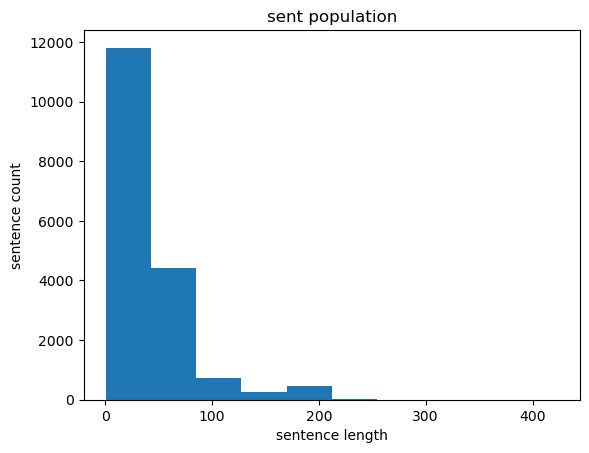

In [32]:
rnn.show_sent_pop(train_data_df)

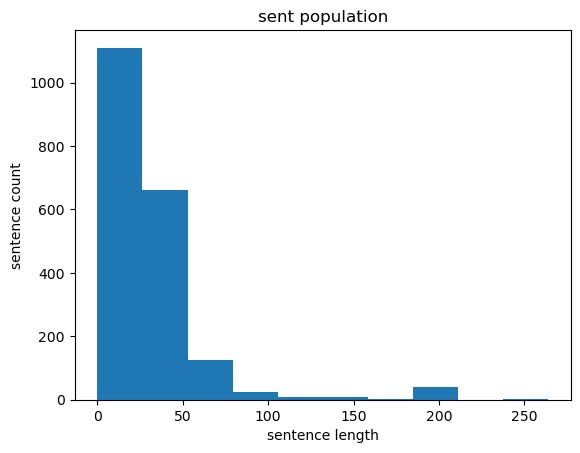

In [33]:
rnn.show_sent_pop(test_data_df)

In [41]:
def padding(data_df, len_data=10):
    """
    sent padding len_data

    Args:
        data_df (DataFrame): encoding text data
        len_data (int, optional): want to padding length. Defaults to 10.

    Returns:
        list: padded text data
    """
    padding_data = data_df['encoding'].to_list()
    for idx, sent in enumerate(padding_data):
        current_len = len(sent)
        if current_len < len_data:
            sent.extend([0]*(len_data-current_len))
            padding_data[idx] = sent
        else:
            sent = sent[:len_data]
            padding_data[idx] = sent
    return padding_data

In [42]:
train_padding = padding(train_data_df, len_data=50)
train_data_df['padding_50'] = train_padding
train_data_df

,text,label,del_stop,encoding,padding_50
0,안녕하세요 라식이 필요한데 스마일라식이 좋다고 해서 스마일라식 안과를 알아봐야 하는...,0,"[안녕하세요, 라식, 필요한데, 스마일, 라, 식이, 좋다고, 해서, 스마일, 라식...","[497, 1, 3341, 1, 508, 2314, 1918, 481, 1, 1, ...","[497, 1, 3341, 1, 508, 2314, 1918, 481, 1, 1, ..."
1,안녕하세요 고 학생입니다 예전부터 몇년 된거같아요 비문증이 있었는데 별로 신경안쓰다...,0,"[안녕하세요, 고, 학생, 입니다, 예전, 된거, 같아요, 비문증, 있었는데, 별로...","[497, 16, 209, 40, 211, 4249, 196, 1, 710, 224...","[497, 16, 209, 40, 211, 4249, 196, 1, 710, 224..."
2,제가 이번에 안경탈출하려고 스마일라식안과를 찾고 있는데 병원이 너무 많아서 스마일라...,0,"[안경, 탈출, 려고, 스마일, 라, 식안과를, 찾고, 있는데, 병원, 너무, 많아...","[1, 1, 2037, 1, 508, 1, 1176, 260, 12, 31, 758...","[1, 1, 2037, 1, 508, 1, 1176, 260, 12, 31, 758..."
3,최근 아버지가 백내장판정을 받고 백내장수술을 하기위해 안과를 가야한다고하는데요 아는...,0,"[최근, 아버지, 백내장, 판정, 받고, 백내장, 수술, 하기, 위해, 안과, 가야...","[299, 672, 1, 533, 468, 1, 783, 366, 669, 5114...","[299, 672, 1, 533, 468, 1, 783, 366, 669, 5114..."
4,성인 되면 꼭 스마일라식 하려고 마음먹고 있었는데요 수험생이면 수험표 이벤트 같은거...,0,"[성인, 되면, 꼭, 스마일, 라식, 하려고, 마음먹고, 있었는데요, 수험생, 면,...","[591, 218, 581, 1, 1, 700, 1, 2400, 1623, 194,...","[591, 218, 581, 1, 1, 700, 1, 2400, 1623, 194,..."
...,...,...,...,...,...
17689,정신과약을 복용후에 살이 키로 넘게 쪗는데 혹시 그냥 살이찐건지 정신과약때문에 찐건...,1,"[정신과, 약, 복용, 후, 살이, 키로, 넘게, 쪗는데, 그냥, 살이, 찐, 건지...","[2, 3, 20, 105, 22, 137, 129, 142, 27, 22, 42,...","[2, 3, 20, 105, 22, 137, 129, 142, 27, 22, 42,..."
17690,월 일에 사후피임약 엘라원복용햇는데 오늘 월 일 오후 정신과에서 꾸준히 맞고 있는...,1,"[사후, 피임, 약, 엘라, 원, 복용, 햇, 는데, 오늘, 오후, 정신과, 꾸준히...","[162, 158, 3, 163, 154, 20, 164, 156, 121, 159...","[162, 158, 3, 163, 154, 20, 164, 156, 121, 159..."
17691,고 인데 정신과 처음 가면 뭐부터 하나요,1,"[고, 인데, 정신과, 처음, 가면, 뭐, 하나요]","[16, 18, 2, 79, 47, 76, 74, 0, 0, 0, 0, 0, 0, ...","[16, 18, 2, 79, 47, 76, 74, 0, 0, 0, 0, 0, 0, ..."
17692,현재 고 학생입니다 우울감을 앓은지 최소 인지하기로 년 정도 되었습니다 중 중 때는...,1,"[현재, 고, 학생, 입니다, 우울, 감, 앓은지, 최소, 인지, 하기로, 정도, ...","[190, 16, 209, 40, 7, 11, 270, 255, 200, 262, ...","[190, 16, 209, 40, 7, 11, 270, 255, 200, 262, ..."


In [43]:
test_padding = padding(test_data_df, len_data=50)
test_data_df['padding_50'] = test_padding
test_data_df

,text,label,del_stop,encoding,padding_50
0,평소에도 마른기침을 자주하는데 기침이 너무 심해서 이비인후과를 가서 약을 타려고 했...,0,"[평소, 에도, 마른, 기침, 자주, 하는데, 기침, 너무, 심해서, 이비인후과, ...","[308, 350, 1, 2300, 638, 97, 2300, 31, 52, 150...","[308, 350, 1, 2300, 638, 97, 2300, 31, 52, 150..."
1,음식 씹을때마다 귀 안이 아픈데 치과랑 이비인후과중 어디가야하나요,0,"[음식, 씹을, 마다, 귀, 안이, 아픈데, 치과, 랑, 이비인후과, 중, 어디가,...","[1349, 1, 183, 1700, 3065, 1, 3751, 89, 1504, ...","[1349, 1, 183, 1700, 3065, 1, 3751, 89, 1504, ..."
2,목안에 큰 편도결석이 일주일째 안빠지고 있는데 이물감고 들고 불편해서요 이비인후과가...,0,"[목안, 큰, 편도결석, 일주일, 째, 안, 빠지고, 있는데, 물감, 고, 들고, ...","[1, 568, 1, 795, 405, 8, 1745, 260, 4331, 16, ...","[1, 568, 1, 795, 405, 8, 1745, 260, 4331, 16, ..."
3,안녕하세요 임파선염으로 이비인후과에서 보령메이액트정 항생제 처방받았고 피부과에서는 ...,0,"[안녕하세요, 임파선, 염, 이비인후과, 보령, 메이, 액트정, 항생제, 처방, 받...","[497, 1, 2739, 1504, 2011, 1, 1, 2193, 25, 132...","[497, 1, 2739, 1504, 2011, 1, 1, 2193, 25, 132..."
4,안녕하세요 제가 평소에 비염 때문에 고생 중이라서요 비염이 너무 심하다 보니 일상생...,0,"[안녕하세요, 평소, 비염, 때문, 고생, 중이, 라서, 요, 비염, 너무, 심하다...","[497, 308, 1026, 43, 1637, 998, 1092, 4, 1026,...","[497, 308, 1026, 43, 1637, 998, 1092, 4, 1026,..."
...,...,...,...,...,...
1978,로 정신과 가보려는데 진단받으면 기록 남아서 나중에 취업같은거에 문제될 수 있나요,1,"[정신과, 가보려는데, 진단, 받으면, 기록, 남아, 서, 나중, 취업, 같은거에,...","[2, 138, 39, 51, 90, 123, 15, 117, 114, 149, 9...","[2, 138, 39, 51, 90, 123, 15, 117, 114, 149, 9..."
1979,정신과약을 복용후에 살이 키로 넘게 쪗는데 혹시 그냥 살이찐건지 정신과약때문에 찐건...,1,"[정신과, 약, 복용, 후, 살이, 키로, 넘게, 쪗는데, 그냥, 살이, 찐, 건지...","[2, 3, 20, 105, 22, 137, 129, 142, 27, 22, 42,...","[2, 3, 20, 105, 22, 137, 129, 142, 27, 22, 42,..."
1980,월 일에 사후피임약 엘라원복용햇는데 오늘 월 일 오후 정신과에서 꾸준히 맞고 있는...,1,"[사후, 피임, 약, 엘라, 원, 복용, 햇, 는데, 오늘, 오후, 정신과, 꾸준히...","[162, 158, 3, 163, 154, 20, 164, 156, 121, 159...","[162, 158, 3, 163, 154, 20, 164, 156, 121, 159..."
1981,고 인데 정신과 처음 가면 뭐부터 하나요,1,"[고, 인데, 정신과, 처음, 가면, 뭐, 하나요]","[16, 18, 2, 79, 47, 76, 74, 0, 0, 0, 0, 0, 0, ...","[16, 18, 2, 79, 47, 76, 74, 0, 0, 0, 0, 0, 0, ..."


In [45]:
train_data_df.to_csv('./train_data_df.csv', index=False, encoding='utf-8')
test_data_df.to_csv('./test_data_df.csv', index=False, encoding='utf-8')